# Declaration of Originality

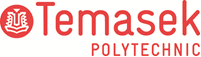

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Shayden Ng (2402491A)
* Tutorial Group                : PC07
* Tutor						    : Ester Goh
* Submission Date               : 11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [33]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV




import joblib

# 1. Business Understanding
Goal: To predict the prices of Ford cars.


# 2. Data Understanding

## 2.1 Load dataset

In [34]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("ford.csv")

# Preview the data
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


## 2.2 Summary Statistics

In [35]:
## Understand the type of variable for each column
df.dtypes


model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [36]:
## Check for missing data
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [37]:
## Describe data distribution
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


The dataset used in this project contains information on Ford vehicles, including both numerical and categorical attributes related to vehicle specifications and pricing. The dataset consists of 17,966 records with nine attributes, including model, year, transmission type, mileage, fuel type, tax, fuel efficiency (mpg), engine size, and price. The target variable for this regression task is vehicle price, which is a continuous numerical variable. An initial inspection showed that the dataset contains no missing values, indicating good data quality and suitability for machine learning analysis.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [38]:
## Understanding distribution of target
df["price"].describe()


count    17966.000000
mean     12279.534844
std       4741.343657
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

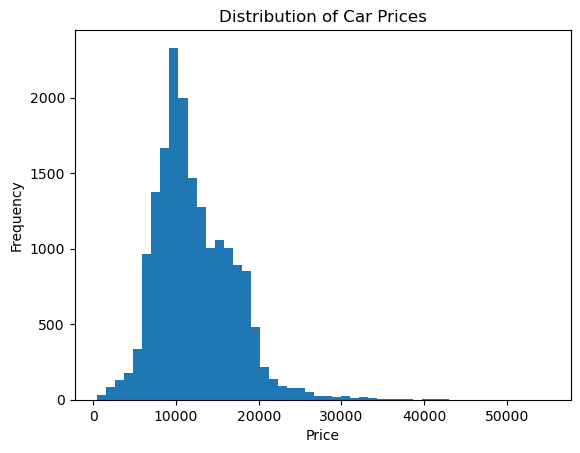

In [39]:
plt.figure()
plt.hist(df["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()


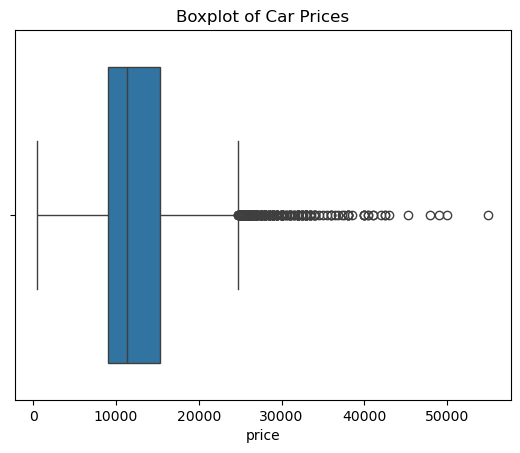

In [40]:
plt.figure()
sns.boxplot(x=df["price"])
plt.title("Boxplot of Car Prices")
plt.show()


### 2.3.1.2 Understanding distribution of features

In [41]:
## Understanding distribution of features
# Numerical features (exclude target)
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_features.remove("price")

# Categorical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

numerical_features, categorical_features


(['year', 'mileage', 'tax', 'mpg', 'engineSize'],
 ['model', 'transmission', 'fuelType'])

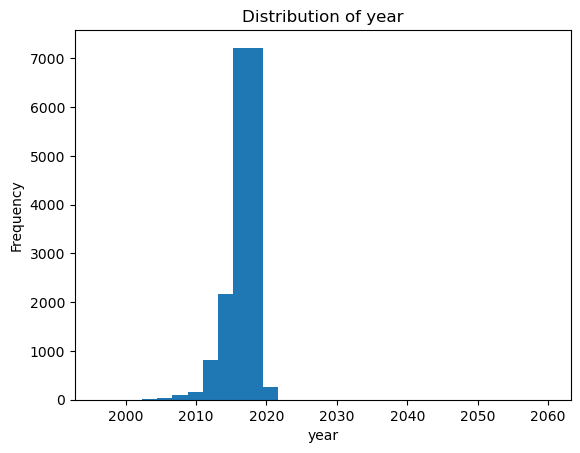

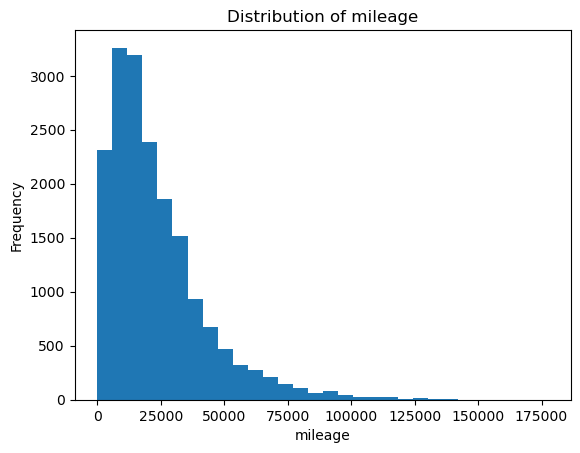

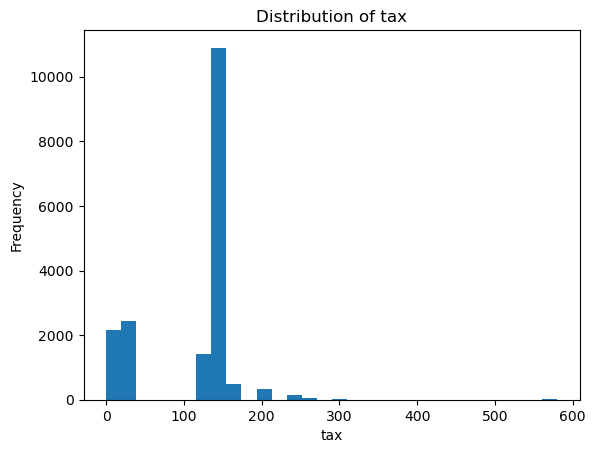

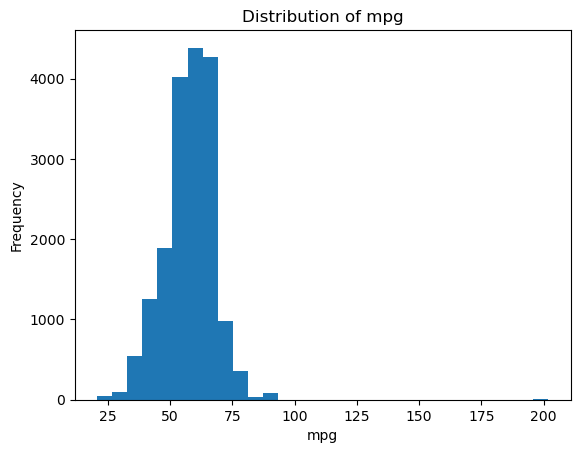

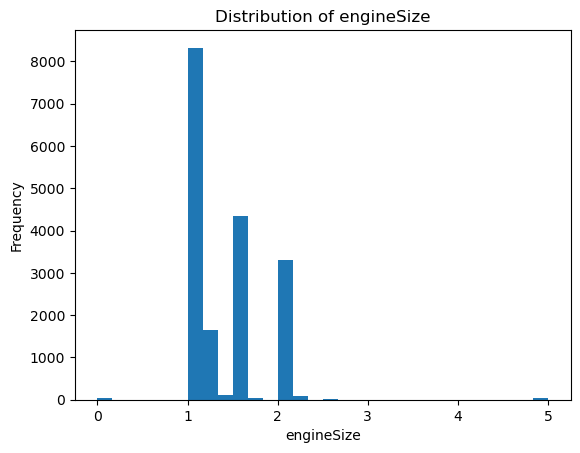

In [42]:
for col in numerical_features:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


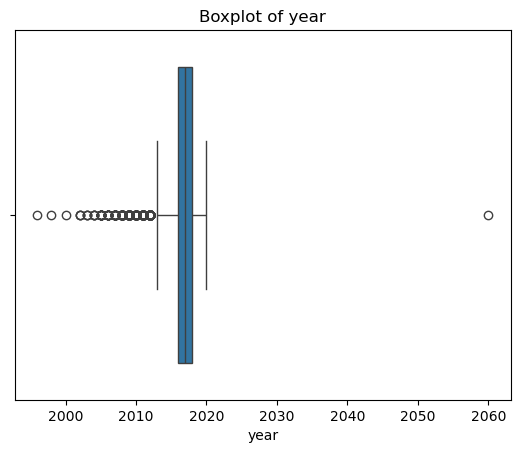

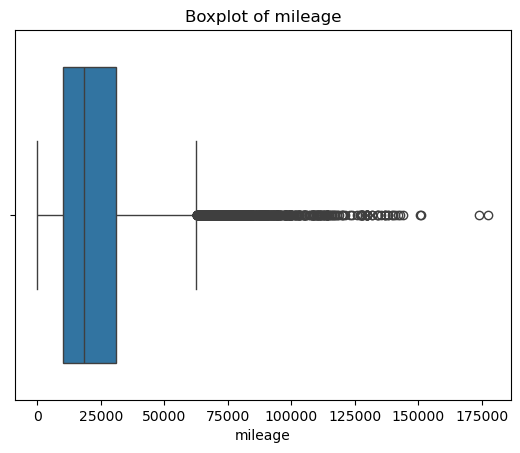

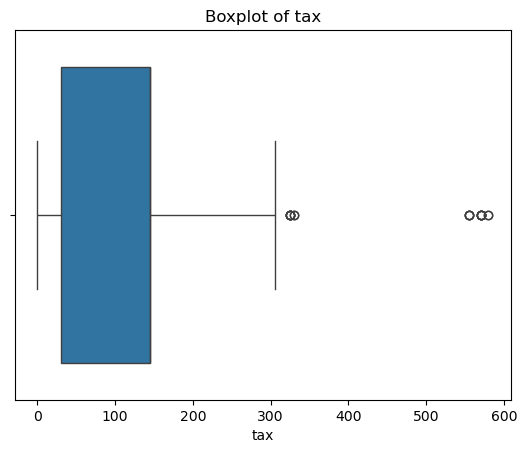

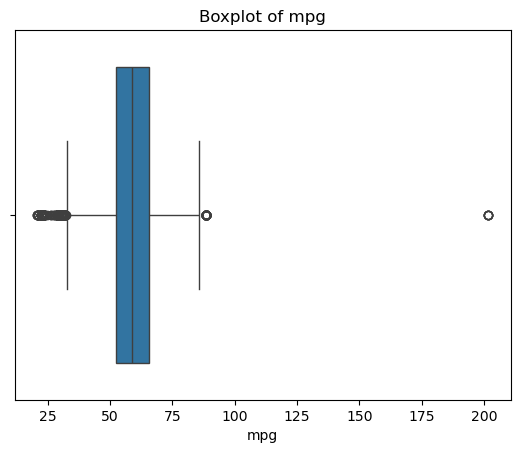

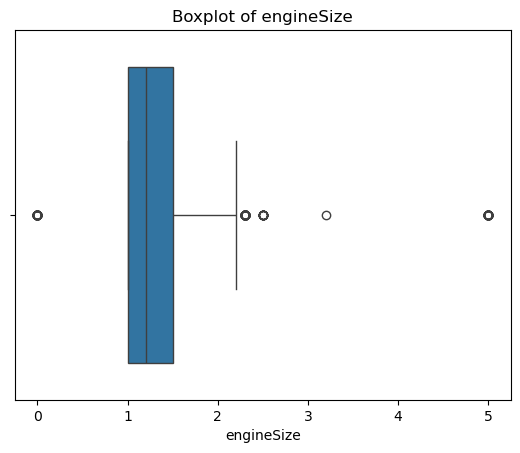

In [43]:
for col in numerical_features:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


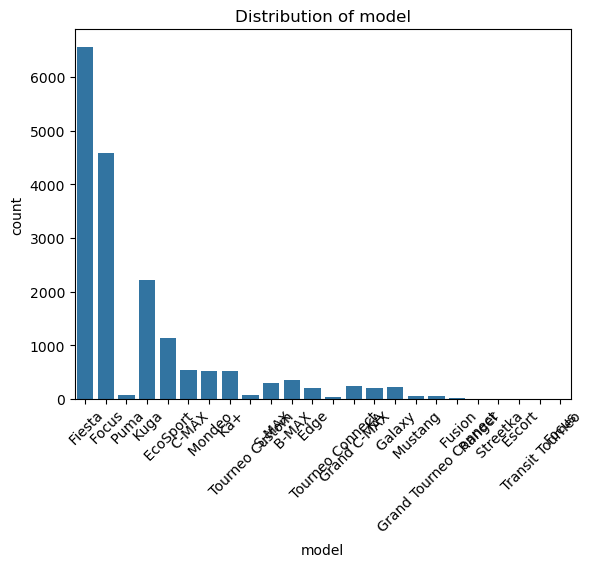

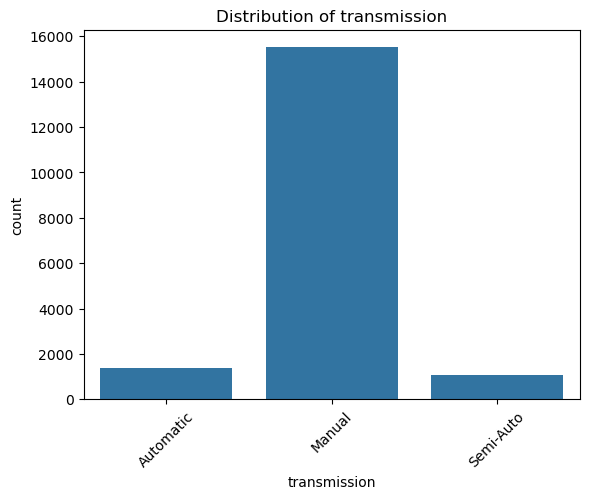

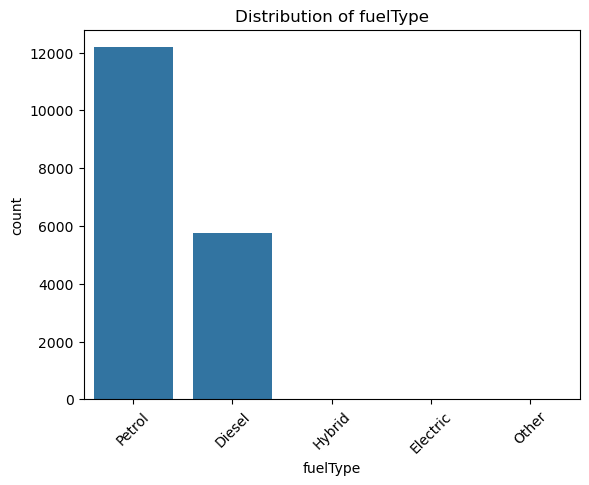

In [44]:
for col in categorical_features:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


### 2.3.2 Understanding relationship between variables

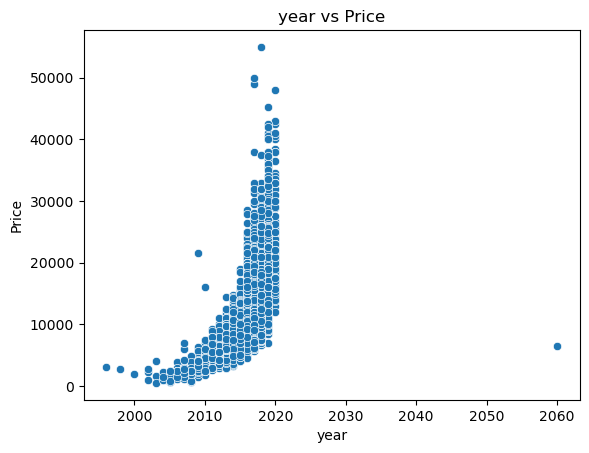

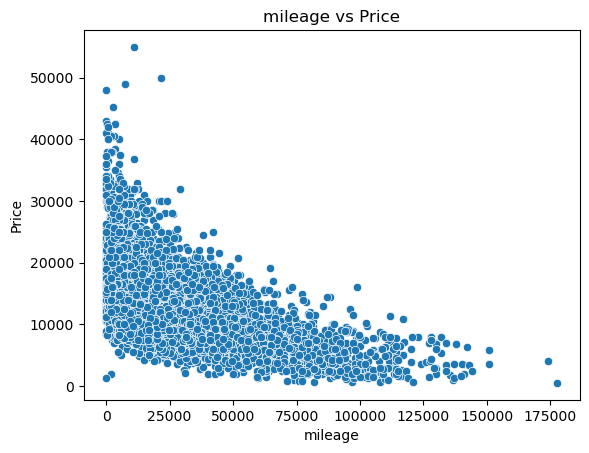

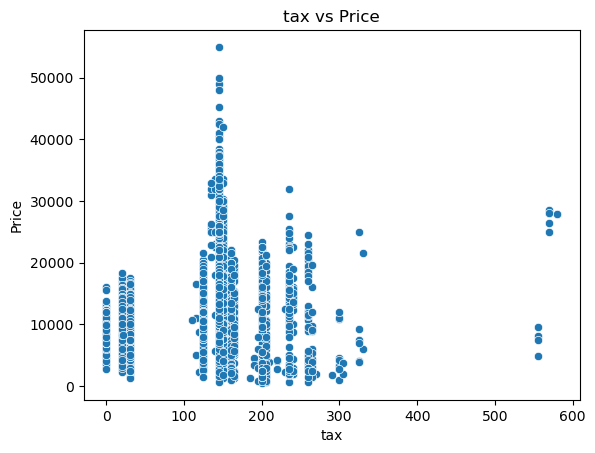

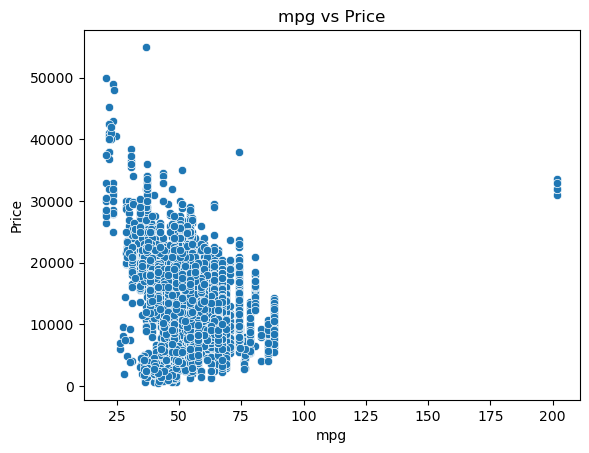

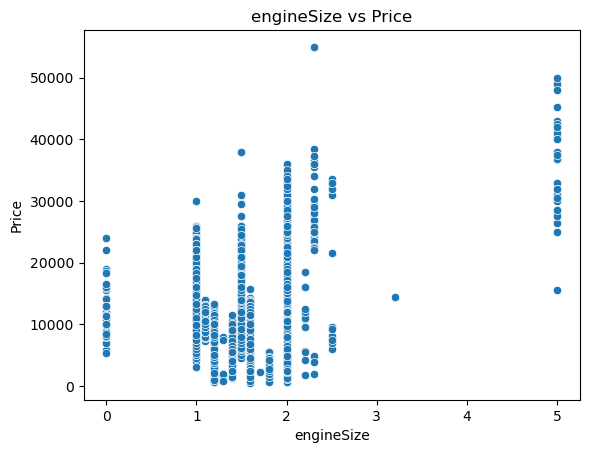

In [45]:
## Understanding relationship between variables
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_features.remove("price")

for col in numerical_features:
    plt.figure()
    sns.scatterplot(x=df[col], y=df["price"])
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"{col} vs Price")
    plt.show()


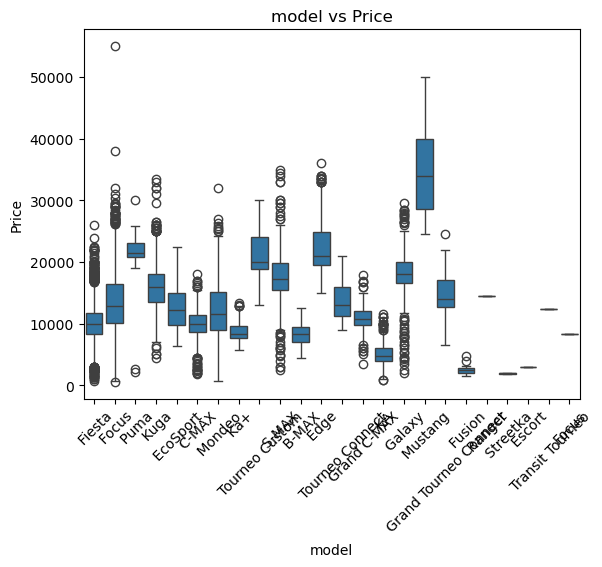

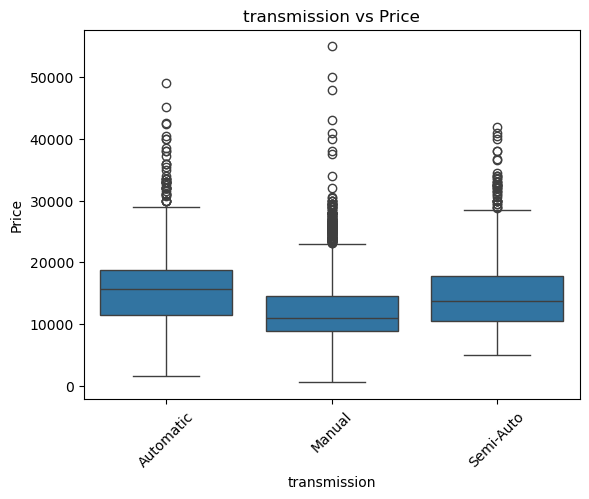

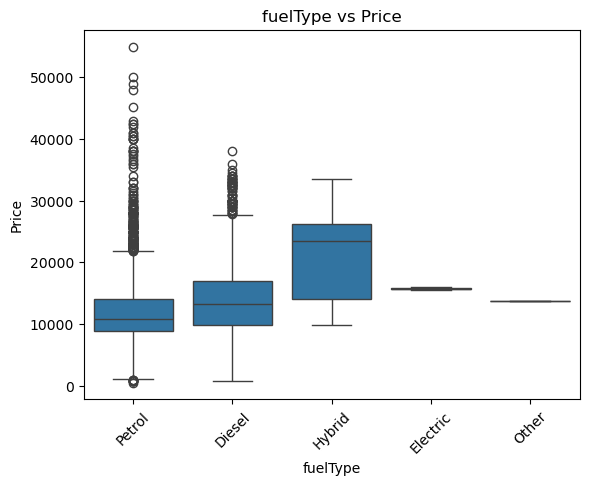

In [46]:
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

for col in categorical_features:
    plt.figure()
    sns.boxplot(x=df[col], y=df["price"])
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"{col} vs Price")
    plt.xticks(rotation=45)
    plt.show()


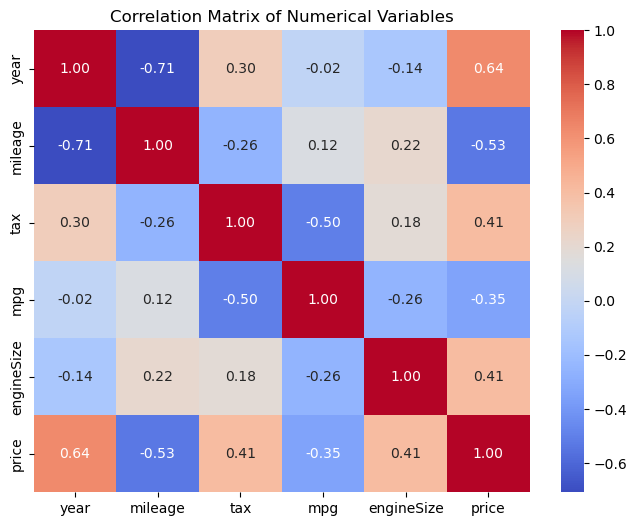

In [47]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_features + ["price"]].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix of Numerical Variables")
plt.show()


Exploratory Data Analysis was conducted to better understand the structure and characteristics of the dataset. The distribution of the target variable, price, was found to be right-skewed, indicating that most vehicles fall within a lower to mid-price range, with fewer high-priced vehicles. Numerical features such as mileage, year, and engine size showed meaningful variation and clear relationships with price, while categorical features such as model, transmission, and fuel type exhibited uneven distributions across categories. Visualizations including histograms, boxplots, scatter plots, and correlation heatmaps were used to identify patterns, outliers, and potential relationships between variables.

# 3. Data Preparation

## 3.1 Data Cleaning

In [48]:
## Clean data
df["year"].sort_values(ascending=False).head()
df = df[df["year"] <= 2026]



In [49]:
df[df["engineSize"] == 0]
df["engineSize"].replace(0, df["engineSize"].median(), inplace=True)


C:\Users\shayd\AppData\Local\Temp\ipykernel_26652\342701935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["engineSize"].replace(0, df["engineSize"].median(), inplace=True)


In [50]:
# Identify categorical columns
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

categorical_features


['model', 'transmission', 'fuelType']

In [51]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(
    df,
    columns=categorical_features,
    drop_first=True
)


In [52]:
# Check new shape
print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)

# Preview encoded data
df_encoded.head()


Original shape: (17965, 9)
Encoded shape: (17965, 35)


,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Categorical variables were transformed into numerical form using One-Hot Encoding. This process converted categorical attributes such as model, transmission type, fuel type, and tax band into binary features suitable for machine learning algorithms. To avoid multicollinearity, the first category of each encoded variable was dropped. After encoding, all features in the dataset were numerical, allowing them to be used directly in model training.

In [53]:
df_encoded.dtypes


year                              int64
price                             int64
mileage                           int64
tax                               int64
mpg                             float64
engineSize                      float64
model_ C-MAX                       bool
model_ EcoSport                    bool
model_ Edge                        bool
model_ Escort                      bool
model_ Fiesta                      bool
model_ Focus                       bool
model_ Fusion                      bool
model_ Galaxy                      bool
model_ Grand C-MAX                 bool
model_ Grand Tourneo Connect       bool
model_ KA                          bool
model_ Ka+                         bool
model_ Kuga                        bool
model_ Mondeo                      bool
model_ Mustang                     bool
model_ Puma                        bool
model_ Ranger                      bool
model_ S-MAX                       bool
model_ Streetka                    bool


Data cleaning was performed to ensure consistency and reliability of the dataset prior to model training. The dataset was checked for missing values and duplicate records, and none were found to significantly affect the analysis. Unrealistic or invalid values, such as future manufacturing years and zero engine sizes, were identified and handled appropriately. Outliers were examined using boxplots; however, they were retained in the dataset as they represent realistic variations in vehicle pricing. These steps ensured that the dataset was clean and suitable for further preprocessing and modeling.

## 3.2 Train-Test Split

In [54]:
## Split data into train set and test set
# Features and target
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]


In [55]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (14372, 34)
X_test shape: (3593, 34)
y_train shape: (14372,)
y_test shape: (3593,)



The dataset was split into training and testing sets using an 80:20 ratio. The training set was used to train the machine learning models, while the test set was reserved for evaluating model performance on unseen data. This separation ensures that the evaluation metrics provide an unbiased estimate of how well the model generalizes to new vehicle data.

# 4. Modelling

### 4.2 Train Model

In [56]:
## Initialise and train model
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1346.8751482330138
Mean Squared Error (MSE): 3126998.595508458
Root Mean Squared Error (RMSE): 1768.3321507874186
R-squared (R²): 0.8498916660874639


In [57]:
# 1) Initialise
dt_model = DecisionTreeRegressor(random_state=2025)

# 2) Train
dt_model.fit(X_train, y_train)

# 3) Predict
dt_pred = dt_model.predict(X_test)

# 4) Evaluate
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Results")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R2:", dt_r2)

Decision Tree Results
MAE: 1077.8422859263383
MSE: 2357404.2529300796
RMSE: 1535.3840734259554
R2: 0.8868352466566678


In [58]:
# 1) Initialise
gb_model = GradientBoostingRegressor(random_state=2025)

# 2) Train
gb_model.fit(X_train, y_train)

# 3) Predict
gb_pred = gb_model.predict(X_test)

# 4) Evaluate
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

print("\nGradient Boosting Results")
print("MAE:", gb_mae)
print("MSE:", gb_mse)
print("RMSE:", gb_rmse)
print("R2:", gb_r2)


Gradient Boosting Results
MAE: 962.6942755225081
MSE: 1697122.4607154233
RMSE: 1302.7365277428216
R2: 0.9185313912870139


In [59]:
rf_model = RandomForestRegressor(
    
    random_state=2025,
    
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)


Random Forest Results
MAE: 859.930751229242
MSE: 1418827.0003245391
RMSE: 1191.14524736681
R2: 0.9318906770745744


In [60]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Gradient Boosting",
        "Random Forest"
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, dt_pred),
        mean_absolute_error(y_test, gb_pred),
        mean_absolute_error(y_test, rf_pred)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, dt_pred),
        mean_squared_error(y_test, gb_pred),
        mean_squared_error(y_test, rf_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, dt_pred)),
        np.sqrt(mean_squared_error(y_test, gb_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred))
    ],
    "R2": [
        r2_score(y_test, y_pred),
        r2_score(y_test, dt_pred),
        r2_score(y_test, gb_pred),
        r2_score(y_test, rf_pred)
    ]
})

print(results)


               Model          MAE           MSE         RMSE        R2
0  Linear Regression  1346.875148  3.126999e+06  1768.332151  0.849892
1      Decision Tree  1077.842286  2.357404e+06  1535.384073  0.886835
2  Gradient Boosting   962.694276  1.697122e+06  1302.736528  0.918531
3      Random Forest   859.930751  1.418827e+06  1191.145247  0.931891


# 5. Model Evaluation

In [61]:
## Evaluate model
# Sort models by best R2
results_sorted = results.sort_values(by="R2", ascending=False)
print("\nModel Comparison (sorted by R2):")
print(results_sorted)

# Pick best model name
best_model_name = results_sorted.iloc[0]["Model"]
print("\nBest model based on R2:", best_model_name)

# Map model name to predictions
pred_map = {
    "Linear Regression": y_pred,
    "Decision Tree": dt_pred,
    "Gradient Boosting": gb_pred,
    "Random Forest": rf_pred
}

best_pred = pred_map[best_model_name]




Model Comparison (sorted by R2):
               Model          MAE           MSE         RMSE        R2
3      Random Forest   859.930751  1.418827e+06  1191.145247  0.931891
2  Gradient Boosting   962.694276  1.697122e+06  1302.736528  0.918531
1      Decision Tree  1077.842286  2.357404e+06  1535.384073  0.886835
0  Linear Regression  1346.875148  3.126999e+06  1768.332151  0.849892

Best model based on R2: Random Forest


Several regression models were explored during the project, including Linear Regression, Decision Tree Regression, Gradient Boosting Regression, and Random Forest Regression. After comparison, Random Forest Regression was selected as the final model due to its superior performance and ability to capture complex, non-linear relationships between features and price. The model was trained using the training dataset, leveraging ensemble learning to reduce overfitting and improve predictive accuracy.

In [62]:

new_data = pd.DataFrame({
    "model": ["Focus"],
    "year": [2015],
    "transmission": ["Manual"],
    "mileage": [5007],
    "fuelType": ["Petrol"],
    "tax": [22],
    "mpg": [57.7],
    "engineSize": [1.0]
})

# Clean strings
for col in ["model", "transmission", "fuelType"]:
    new_data[col] = new_data[col].astype(str).str.strip()

# Apply SAME feature engineering as training
current_year = 2026
new_data["car_age"] = current_year - new_data["year"]
new_data["mileage_per_year"] = new_data["mileage"] / (new_data["car_age"] + 1)
new_data["mpg_per_engine"] = new_data["mpg"] / (new_data["engineSize"] + 0.1)
new_data["tax_band"] = pd.cut(
    new_data["tax"],
    bins=[-np.inf, 0, 100, 200, 500, np.inf],
    labels=["Zero", "Low", "Medium", "High", "Very High"],
    include_lowest=True
)

new_data = new_data.drop("year", axis=1)

# OHE + align columns to training
new_encoded = pd.get_dummies(new_data, drop_first=True)
new_encoded = new_encoded.reindex(columns=X_train.columns, fill_value=0)

pred_price = rf_model.predict(new_encoded)[0]
print(f"Predicted Price: £{pred_price:,.0f}")

Predicted Price: £3,057


The trained Random Forest model was used to predict vehicle prices for new, unseen data. User-provided inputs were processed using the same feature engineering and encoding steps applied to the training data to ensure consistency. The model successfully generated price predictions based on the input vehicle specifications, demonstrating its practical applicability for real-world price estimation.

## Iterative model development


Random Forest - Top 20 Feature Importances:
year                      0.484538
engineSize                0.252300
mileage                   0.071813
mpg                       0.061916
model_ Kuga               0.029979
model_ Fiesta             0.021276
model_ Ka+                0.017710
model_ Mustang            0.010880
model_ Edge               0.009209
tax                       0.008600
model_ Focus              0.004624
model_ Puma               0.004191
model_ S-MAX              0.004102
transmission_Manual       0.003547
model_ KA                 0.002930
model_ Galaxy             0.002877
model_ Mondeo             0.002006
transmission_Semi-Auto    0.001771
model_ EcoSport           0.001420
model_ C-MAX              0.001121
dtype: float64


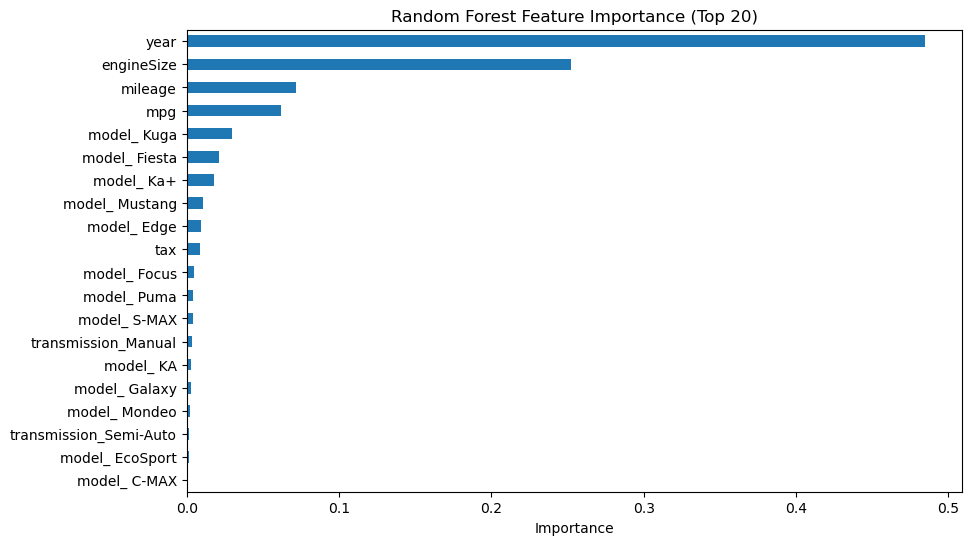

In [63]:
## Further feature engineering / feature selection
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_top = rf_importance.sort_values(ascending=False).head(20)

print("Random Forest - Top 20 Feature Importances:")
print(rf_top)

plt.figure(figsize=(10, 6))
rf_top.sort_values().plot(kind="barh")
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance (Top 20)")
plt.show()

In [64]:
# Convert year to car age
current_year = 2026
df_fe = df.copy()
df_fe["car_age"] = current_year - df_fe["year"]

# Drop original year
df_fe.drop("year", axis=1, inplace=True)


In [65]:
# Prevent division by zero
df_fe["mileage_per_year"] = df_fe["mileage"] / (df_fe["car_age"] + 1)


In [66]:
df_fe["mpg_per_engine"] = df_fe["mpg"] / (df_fe["engineSize"] + 0.1)


In [67]:
df["tax_band"] = pd.cut(
    df["tax"],
    bins=[-np.inf, 0, 100, 300, 500, np.inf],
    labels=["Zero", "Low", "Medium", "High", "Very High"],
    include_lowest=True
).astype("category")

In [68]:
categorical_features = df_fe.select_dtypes(include=["object", "category"]).columns.tolist()

df_fe_encoded = pd.get_dummies(
    df_fe,
    columns=categorical_features,
    drop_first=True
)


In [69]:
X = df_fe_encoded.drop("price", axis=1)
y = df_fe_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025
)


In [70]:


rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=2025,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
rf_pred = rf_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2:", r2_score(y_test, rf_pred))

MAE: 860.0625464218342
MSE: 1428457.4553054678
RMSE: 1195.1809299455324
R2: 0.9314283770421781


Feature engineering was applied to improve the predictive capability of the model. The manufacturing year was transformed into car age to better represent vehicle depreciation over time. Additional features such as mileage per year and fuel efficiency per engine size were created to capture vehicle usage intensity and engine performance. The road tax feature was also grouped into categorical tax bands to better represent pricing tiers. These engineered features provided more meaningful representations of the data and allowed the Random Forest model to better capture non-linear relationships in vehicle pricing.

## HYPER PARAMETER TUNING

In [72]:

param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"]
}

In [73]:
rf_base = RandomForestRegressor(
    random_state=2025,
    n_jobs=-1
)

rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=10,          # keep small for speed
    cv=3,
    scoring="r2",
    random_state=2025,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

,estimator,RandomForestR...om_state=2025)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,2025
,error_score,nan


In [74]:
best_params = rf_search.best_params_
best_params

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [75]:
rf_tuned = rf_search.best_estimator_

In [76]:

rf_tuned_pred = rf_tuned.predict(X_test)

rf_tuned_mae = mean_absolute_error(y_test, rf_tuned_pred)
rf_tuned_mse = mean_squared_error(y_test, rf_tuned_pred)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_pred))
rf_tuned_r2 = r2_score(y_test, rf_tuned_pred)

print("Tuned Random Forest Results")
print("MAE:", rf_tuned_mae)
print("MSE:", rf_tuned_mse)
print("RMSE:", rf_tuned_rmse)
print("R2:", rf_tuned_r2)

Tuned Random Forest Results
MAE: 805.9712058202709
MSE: 1266045.2729461032
RMSE: 1125.1867724720653
R2: 0.9392248059040526


In [78]:
# BASE MODEL (no feature engineering)
df_base = df.copy()

# Remove engineered columns if they exist
for col in ["car_age", "mileage_per_year", "mpg_per_engine", "tax_band"]:
    if col in df_base.columns:
        df_base = df_base.drop(columns=[col])

# Clean strings
for col in ["model", "transmission", "fuelType"]:
    df_base[col] = df_base[col].astype(str).str.strip()

# One-hot encode baseline
df_base_encoded = pd.get_dummies(
    df_base,
    columns=["model", "transmission", "fuelType"],
    drop_first=True
)

X_base = df_base_encoded.drop("price", axis=1)
y_base = df_base_encoded["price"]

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_base, y_base, test_size=0.2, random_state=2025
)

rf_base_model = RandomForestRegressor(
    n_estimators=100,
    random_state=2025,
    n_jobs=-1
)

rf_base_model.fit(X_train_base, y_train_base)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
# Base Random Forest predictions
rf_base_pred = rf_base_model.predict(X_test_base)

rf_base_mae = mean_absolute_error(y_test_base, rf_base_pred)
rf_base_mse = mean_squared_error(y_test_base, rf_base_pred)
rf_base_rmse = np.sqrt(mean_squared_error(y_test_base, rf_base_pred))
rf_base_r2 = r2_score(y_test_base, rf_base_pred)

In [80]:
rf_fe_pred = rf_model.predict(X_test)

rf_fe_mae = mean_absolute_error(y_test, rf_fe_pred)
rf_fe_mse = mean_squared_error(y_test, rf_fe_pred)
rf_fe_rmse = np.sqrt(mean_squared_error(y_test, rf_fe_pred))
rf_fe_r2 = r2_score(y_test, rf_fe_pred)

In [81]:
rf_tuned_pred = rf_tuned.predict(X_test)

rf_tuned_mae = mean_absolute_error(y_test, rf_tuned_pred)
rf_tuned_mse = mean_squared_error(y_test, rf_tuned_pred)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_pred))
rf_tuned_r2 = r2_score(y_test, rf_tuned_pred)

In [82]:
comparison_all = pd.DataFrame({
    "Model": [
        "Base Random Forest",
        "Random Forest + Feature Engineering",
        "Random Forest + Feature Engineering + Hyperparameter Tuning"
    ],
    "MAE": [
        rf_base_mae,
        rf_fe_mae,
        rf_tuned_mae
    ],
    "MSE": [
        rf_base_mse,
        rf_fe_mse,
        rf_tuned_mse
    ],
    "RMSE": [
        rf_base_rmse,
        rf_fe_rmse,
        rf_tuned_rmse
    ],
    "R2": [
        rf_base_r2,
        rf_fe_r2,
        rf_tuned_r2
    ]
})

comparison_all

,Model,MAE,MSE,RMSE,R2
0,Base Random Forest,860.706592,1.422252e+06,1192.582148,0.931726
1,Random Forest + Feature Engineering,860.062546,1.428457e+06,1195.180930,0.931428
2,Random Forest + Feature Engineering + Hyperpar...,805.971206,1.266045e+06,1125.186772,0.939225


The performance of the base model, feature engineering model, and hyperparameter tuning model was compared using MAE, RMSE, and R2 metrics. The results show that each enhancement step improved model performance, with the hyperparameter tuning model achieving the best overall results.

FINAL METRIC CHOSEN: RMSE


I chose RMSE as my metric because car prices usually have a wide price range and RMSE penalises large errors stronger than MAE. As shown in my histogram above, this dataset distribution is right-skewed. RMSE highlights when the model fails badly on more expensive cars. So all in all, RMSE was chosen because it is important for vehicle price prediction where high-value errors have greater impact.

FINAL MODEL CHOSEN: RANDOM FOREST + FEATURE ENGINEERING + HYPER PARAMETER TUNING

I chose random forest + feature engineering + hyper parameter tuning because hyper parameter tuning was performed to improve the predictive performance of the random forest model beyond the default configuration. While the base model and feature-engineered model provided reasonable accuracy, their performance was limited by fixed hyper parameter settings that may not be optimal for the dataset. Hyper parameter tuning allows key model parameters, such as the number of trees, tree depth, and minimum sample requirements, to be systematically optimised using cross-validation. This process helps balance model complexity and generalisation, reduces overfitting, and enables the model to better capture non-linear relationships in the data. As a result, the tuned model achieved improved evaluation metrics compared to the untuned models.

In [83]:
joblib.dump(rf_tuned, "ford.pkl")
joblib.dump(X_train.columns.tolist(), "ford_columns.pkl")

['ford_columns.pkl']